In [16]:
import numpy as np
import os
import h5py
import vtk
import pyvista as pv
from vtk.util.numpy_support import numpy_to_vtk

import matplotlib.pyplot as plt


In [10]:
with h5py.File("../data/BIIAX/200_10-layer_01_1.vol.h5","r") as f:
    vol = f["raw"][:]

with h5py.File("../predict/BIIAX/model_128x128x128-02_24-07-05/best_checkpoint/200_10-layer_01_1.vol.pred.h5","r") as f:
    pred = f["predictions"][:]

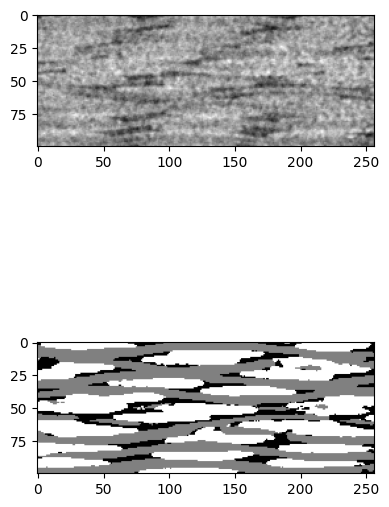

In [13]:
fig, axs = plt.subplots(2,1,figsize=(4,2*4))

axs[0].imshow(vol[200:300,0,:],cmap="grey")
axs[1].imshow(pred[200:300,0,:],cmap="grey")


fig.tight_layout()

Original 3D Array:
(500, 256, 256)

One-Hot Encoded 4D Array:


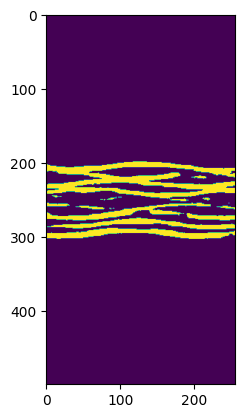

In [28]:
# Get the shape of the input array
x, y, z = pred.shape

# Create a new 4D array with an additional dimension for the layers
# The last dimension has 3 channels (for 0, 1, and 2)
array_4d = np.zeros((x, y, z, 3), dtype=np.uint8)

# Fill the 4D array: One-hot encoding for values 0, 1, and 2
array_4d[pred == 0, 0] = 1  # Channel for 0
array_4d[pred == 1, 1] = 1  # Channel for 1
array_4d[pred == 2, 2] = 1  # Channel for 2

# Print the results (for verification)
print("Original 3D Array:")
print(pred.shape)

print("\nOne-Hot Encoded 4D Array:")
plt.imshow(array_4d[:,0,:,1])

In [33]:
array_material = pred



# Create a VTKImageData object
image_data0 = vtk.vtkImageData()
image_data0.SetDimensions(tuple(x+1 for x in pred.shape)) ## important add +1 to every dimension